In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from  pandas_profiling import ProfileReport

In [10]:
df=pd.read_csv('car_sales-1.csv',index_col=0)

In [11]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 1 to 93
Data columns (total 27 columns):
Manufacturer          93 non-null object
Model                 93 non-null object
Type                  93 non-null object
Min.Price             93 non-null float64
Price                 93 non-null float64
Max.Price             93 non-null float64
MPG.city              93 non-null int64
MPG.highway           93 non-null int64
AirBags               93 non-null object
DriveTrain            93 non-null object
Cylinders             93 non-null object
EngineSize            93 non-null float64
Horsepower            93 non-null int64
RPM                   93 non-null int64
Rev.per.mile          93 non-null int64
Man.trans.avail       93 non-null object
Fuel.tank.capacity    93 non-null float64
Passengers            93 non-null int64
Length                93 non-null int64
Wheelbase             93 non-null int64
Width                 93 non-null int64
Turn.circle           93 non-null int64


In [13]:
df.Manufacturer.value_counts()
#drop because total 93 rows are there and the number of subcategories are huge

Chevrolet        8
Ford             8
Dodge            6
Pontiac          5
Mazda            5
Toyota           4
Buick            4
Oldsmobile       4
Nissan           4
Hyundai          4
Volkswagen       4
Subaru           3
Honda            3
Mercury          2
Mercedes-Benz    2
Cadillac         2
Chrysler         2
Lincoln          2
Eagle            2
Audi             2
Volvo            2
Acura            2
Geo              2
Lexus            2
Mitsubishi       2
BMW              1
Saturn           1
Plymouth         1
Infiniti         1
Saab             1
Suzuki           1
Chrylser         1
Name: Manufacturer, dtype: int64

In [14]:
data=df.drop(columns=['Manufacturer','Model','Min.Price','Max.Price'])

In [15]:
# check for origin column
data.Origin.value_counts()

USA        48
non-USA    45
Name: Origin, dtype: int64

In [16]:
# test for nomality
st.shapiro(data.Price)

#H0: Data is normal
# H1: Data is not normal

# p value less than 0.05 so we reject our null data is not normal

# go with non parametric test of ttest

(0.8805127143859863, 4.2348321471763484e-07)

In [17]:
sns.distplot(data.Price)

In [18]:
st.mannwhitneyu(data[data.Origin=='USA'].Price,data[data.Origin=='non-USA'].Price)
# origin is non significant 

MannwhitneyuResult(statistic=1024.5, pvalue=0.3362027587964973)

In [19]:
data.drop(columns='Origin',inplace=True)

In [20]:
# Wheelbase
sns.scatterplot(data.Wheelbase,data.Price)
plt.show()
# price is skewed so we go with non parametric test of levene i.e. bartlett


# use levene only if both the continuous columns are normally distributed

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
st.bartlett(data.Wheelbase,data.Price)
# wheelbase column is significant
# var is not constant


BartlettResult(statistic=10.872177231543183, pvalue=0.0009761970105959059)

In [22]:
sns.scatterplot(data['Man.trans.avail'],data.Price)
plt.show()

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  


In [23]:
st.mannwhitneyu(data[data['Man.trans.avail']=='Yes'].Price,data[data['Man.trans.avail']=='No'].Price)
# significant feature

MannwhitneyuResult(statistic=530.5, pvalue=0.0001597845341816056)

In [24]:
data[data['Man.trans.avail']=='Yes'].Price.mean()

17.237704918032787

In [25]:
data[data['Man.trans.avail']=='No'].Price.mean()

23.840625

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()

In [28]:
X=data[['Man.trans.avail']]
y=data.Price

In [29]:
X=X.replace({'Yes':1,'No':0})

In [30]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lr.coef_

array([-6.60292008])

In [32]:
lr.intercept_

23.840625

In [33]:
sns.scatterplot(data['Man.trans.avail'],data.Price)
plt.plot(data['Man.trans.avail'],lr.predict(X),color='r')

In [34]:
data['Man.trans.avail'].replace({'Yes':1,'No':0}).corr(data.Price)

-0.3265044315339305

In [35]:
data.head()

,Type,Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Make
1,Small,15.9,25,31,None,Front,4,1.8,140,6300,...,13.2,5,177,102,68,37,26.5,11.0,2705,Acura Integra
2,Midsize,33.9,18,25,Driver & Passenger,Front,6,3.2,200,5500,...,18.0,5,195,115,71,38,30.0,15.0,3560,Acura Legend
3,Compact,29.1,20,26,Driver only,Front,6,2.8,172,5500,...,16.9,5,180,102,67,37,28.0,14.0,3375,Audi 90
4,Midsize,37.7,19,26,Driver & Passenger,Front,6,2.8,172,5500,...,21.1,6,193,106,70,37,31.0,17.0,3405,Audi 100
5,Midsize,30.0,22,30,Driver only,Rear,4,3.5,208,5700,...,21.1,4,186,109,69,39,27.0,13.0,3640,BMW 535i


In [28]:
data.drop(columns=['Make'],inplace=True)

In [29]:
data.columns

Index(['Type', 'Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight'],
      dtype='object')

In [30]:
data.dtypes

Type                   object
Price                 float64
MPG.city                int64
MPG.highway             int64
AirBags                object
DriveTrain             object
Cylinders              object
EngineSize            float64
Horsepower              int64
RPM                     int64
Rev.per.mile            int64
Man.trans.avail        object
Fuel.tank.capacity    float64
Passengers              int64
Length                  int64
Wheelbase               int64
Width                   int64
Turn.circle             int64
Rear.seat.room        float64
Luggage.room          float64
Weight                  int64
dtype: object

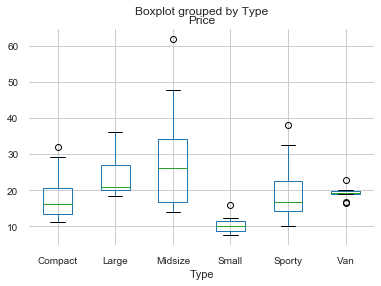

In [31]:
data.boxplot(column='Price',by='Type')

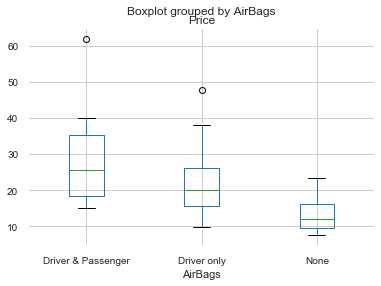

In [32]:
data.boxplot(column='Price',by='AirBags')
plt.show()

In [33]:
data.Type.replace({'Small':0,'Compact':1,'Sporty':2,'Van':3,'Large':4,'Midsize':5},inplace=True)

In [34]:
data.Cylinders.replace({'3':0,'4':1,'6':2,'5':3,'rotary':4,'8':5},inplace=True)

In [35]:
data.AirBags.replace({'Driver & Passenger':0,'Driver only':1,'None':2},inplace=True)

In [36]:
data['Man.trans.avail'].replace({'Yes':1,'No':0},inplace=True)

In [37]:
data.DriveTrain.replace({'Front':0,'4WD':1,'Rear':2},inplace=True)

In [38]:
data.Passengers.replace({4:0,5:1,8:2,7:3,6:4,2:5},inplace=True)

In [39]:
X=data.drop(columns='Price')
y=data.Price

In [40]:
lr=LinearRegression()

In [41]:
data.shape

(93, 21)

C:\Users\Divy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Divy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


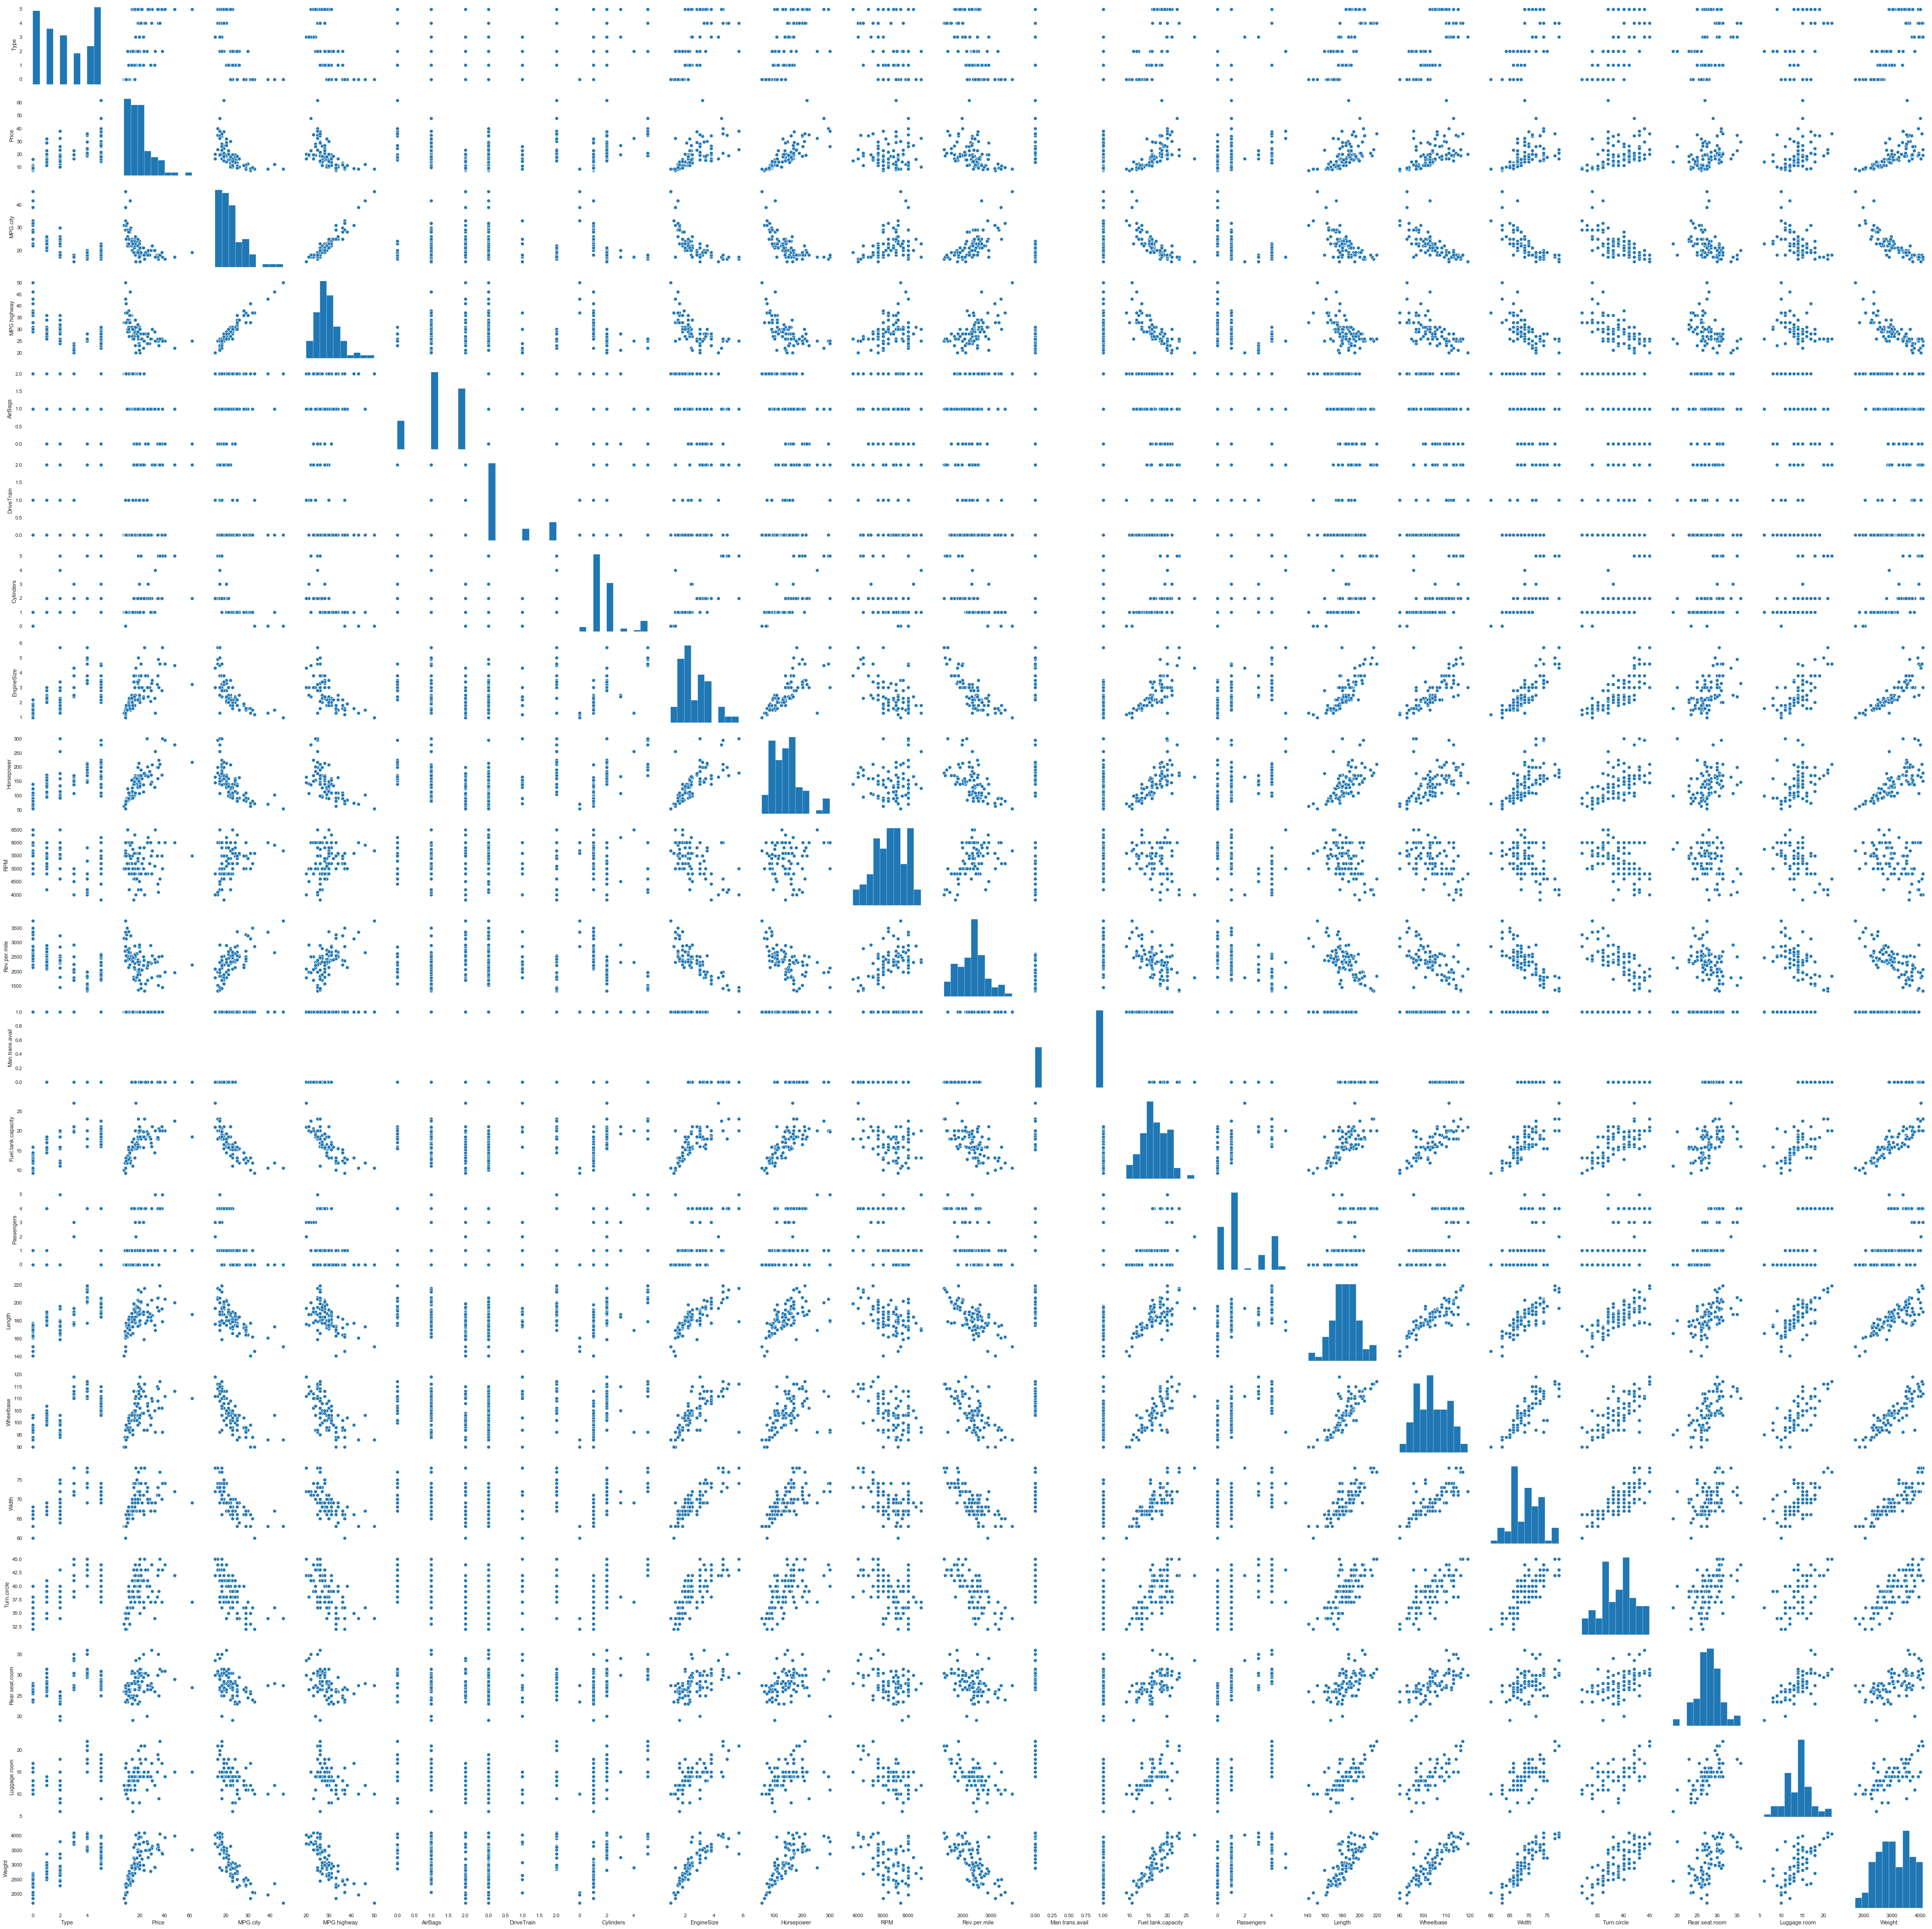

In [42]:
sns.pairplot(data)

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X.isnull().sum()

Type                   0
MPG.city               0
MPG.highway            0
AirBags                0
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
dtype: int64

In [10]:
X['Rear.seat.room'].fillna(X['Rear.seat.room'].median(),inplace=True)
X['Luggage.room'].fillna(X['Luggage.room'].median(),inplace=True)

NameError: name 'X' is not defined

In [8]:
from sklearn.model_selection import cross_val_score


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [4]:
lr=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()
svr=SVR()

In [5]:
models=[]
models.append(('MVLR',lr))
models.append(('KNN',knn))
models.append(('RF',rf))
models.append(('SVR',svr))

In [9]:
results=[]
names=[]
for name,model in models:
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results=cross_val_score(model,X,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)"%(name,np.mean(np.sqrt(np.abs(cv_results))),np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
    

NameError: name 'X' is not defined

In [51]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
lr.score(X,y)

0.8240601067095452

In [53]:
y_pred=lr.predict(X)

In [54]:
np.corrcoef(y_pred,y)

array([[1.        , 0.90777756],
       [0.90777756, 1.        ]])

In [55]:
0.90777756**2

0.8240600984395535

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
knn=KNeighborsRegressor()

In [58]:
params={'n_neighbors':np.arange(3,20),
        'weights':['uniform','distance']
       }

In [59]:
gsearch=GridSearchCV(knn,params,cv=3,scoring='neg_mean_squared_error')

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()

In [62]:
X_scaled=sc.fit_transform(X)

In [63]:
gsearch.fit(X_scaled,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [64]:
gsearch.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [65]:
np.sqrt(np.abs(gsearch.best_score_))

6.1708607078313396

In [66]:
pd.DataFrame(gsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000985,0.000016,0.000676,0.000479,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",-34.796380,-73.144158,-12.709821,-40.216786,24.968151,5
1,0.000332,0.000470,0.001010,0.000018,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",-31.732560,-70.674165,-11.831841,-38.079522,24.437917,1
2,0.001330,0.000470,0.001997,0.000816,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",-34.012440,-78.381694,-12.840625,-41.744919,27.309966,7
3,0.001677,0.000450,0.002977,0.000020,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",-30.389913,-75.306338,-11.220043,-38.972098,26.857696,2
4,0.000666,0.000942,0.000694,0.000981,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",-33.495252,-81.491432,-11.213574,-42.066753,29.324021,8
5,0.000000,0.000000,0.000000,0.000000,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",-30.885283,-78.654678,-9.282839,-39.607600,28.984733,3
6,0.000000,0.000000,0.000000,0.000000,6,uniform,"{'n_neighbors': 6, 'weights': 'uniform'}",-35.997070,-82.022052,-11.787419,-43.268847,29.130568,12
7,0.000000,0.000000,0.005205,0.007360,6,distance,"{'n_neighbors': 6, 'weights': 'distance'}",-31.756796,-79.553155,-9.314273,-40.208075,29.290991,4
8,0.000000,0.000000,0.000000,0.000000,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",-35.270033,-82.660395,-15.655240,-44.528556,28.127245,16
9,0.000000,0.000000,0.000000,0.000000,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",-31.099544,-80.530727,-9.891918,-40.507397,29.595508,6


## Customize GridSearch 


In [67]:
rmse_avg=[]
rmse_var=[]
param=[]
for p2 in ['uniform','distance']:
    for p1 in np.arange(3,20):
        model=KNeighborsRegressor(n_neighbors=p1,weights=p2)
        kfold=KFold(shuffle=True,n_splits=3,random_state=0)
        mse=cross_val_score(model,X_scaled,y,cv=kfold,scoring='neg_mean_squared_error')
        rmse_avg.append(np.mean(np.sqrt(np.abs(mse))))
        rmse_var.append(np.var(np.sqrt(np.abs(mse)),ddof=1))
        param.append([p2,p1])
        
        

In [68]:
result=pd.DataFrame({'Param':param,'bias_error':rmse_avg,'var_error':rmse_var})

In [69]:
result[result.bias_error==result.bias_error.min()]





# will go with high variance error because we can reduce the var error there but there is no scope improving your bias error

,Param,bias_error,var_error
18,"[distance, 4]",5.940551,3.411359


In [70]:
result[result.var_error==result.var_error.min()]

,Param,bias_error,var_error
5,"[uniform, 8]",6.440542,2.960884


In [71]:
result

,Param,bias_error,var_error
0,"[uniform, 3]",6.227371,3.748164
1,"[uniform, 4]",6.057765,3.722740
2,"[uniform, 5]",6.216966,4.045363
3,"[uniform, 6]",6.358371,5.144698
4,"[uniform, 7]",6.352923,5.173775
5,"[uniform, 8]",6.440542,2.960884
6,"[uniform, 9]",6.623871,2.966735
7,"[uniform, 10]",6.643322,3.040559
8,"[uniform, 11]",6.711749,3.622543
9,"[uniform, 12]",6.785451,4.078741


In [72]:
#from sklearn.metrics import SCORERS

In [73]:
#SCORERS

In [74]:
from sklearn.ensemble import BaggingRegressor
knn=KNeighborsRegressor(n_neighbors=4,weights='distance')

In [75]:
rmse_avg=[]
rmse_var=[]
param=[]
for i in np.arange(1,50):
    model=BaggingRegressor(base_estimator=knn,n_estimators=i,random_state=0)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    mse=cross_val_score(model,X_scaled,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse_avg.append(np.mean(np.sqrt(np.abs(mse))))
    rmse_var.append(np.var(np.sqrt(np.abs(mse)),ddof=1))
    param.append(i)
    

In [76]:
result=pd.DataFrame({'bias_error':rmse_avg,'var_error':rmse_var},index=param)
result

,bias_error,var_error
1,6.704769,2.678625
2,6.228667,4.378502
3,6.044512,5.249052
4,5.988501,4.819998
5,6.003270,4.054036
6,5.971036,4.198873
7,5.923610,4.282579
8,5.885967,4.090936
9,5.930905,3.952978
10,5.909681,4.032438


In [77]:
result[result.var_error==result.var_error.min()]

,bias_error,var_error
1,6.704769,2.678625


In [78]:
result[result.bias_error==result.bias_error.min()]

,bias_error,var_error
13,5.868507,4.078208


In [79]:
rmse_avg_s=(rmse_avg-np.min(rmse_avg))/np.max(rmse_avg)
rmse_var_s=(rmse_var-np.min(rmse_var))/np.max(rmse_var)

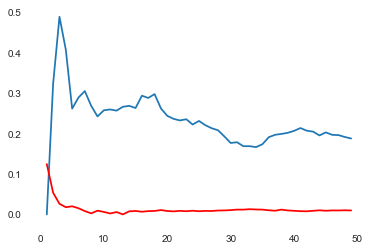

In [80]:
X_axis=np.arange(1,50)
plt.plot(X_axis,rmse_var_s)
plt.plot(X_axis,rmse_avg_s,color='r')
plt.show()

### DTR, RFR, AdaBoost, Gradient Boost Regressor


In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor

In [82]:
lr_bag=BaggingRegressor(n_estimators=10,random_state=0)
lr_boost=AdaBoostRegressor(n_estimators=100,random_state=0)
Gboost=GradientBoostingRegressor(n_estimators=100,random_state=0)

In [83]:
dtree=DecisionTreeRegressor(random_state=0)

In [84]:
params={'max_depth':np.arange(3,20),
       'criterion':['mse','mae'],
       'min_samples_leaf':np.arange(5,15)}

In [85]:
gsearch=GridSearchCV(dtree,params,cv=3,scoring='neg_mean_squared_error')

In [86]:
gsearch.fit(X_scaled,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samp

In [87]:
gsearch.best_params_

{'criterion': 'mae', 'max_depth': 5, 'min_samples_leaf': 7}

In [88]:
dtree=gsearch.best_estimator_

In [89]:
rf=RandomForestRegressor()

In [90]:
rmse_avg=[]
rmse_var=[]
param=[]
for i in np.arange(1,50):
    model=RandomForestRegressor(n_estimators=i,random_state=0)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    mse=cross_val_score(model,X_scaled,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse_avg.append(np.mean(np.sqrt(np.abs(mse))))
    rmse_var.append(np.var(np.sqrt(np.abs(mse)),ddof=1))
    param.append(i)
 

In [91]:
result=pd.DataFrame({'bias_error':rmse_avg,'var_error':rmse_var},index=param)
print(result[result.var_error==result.var_error.min()])

result[result.bias_error==result.bias_error.min()]

   bias_error  var_error
2    6.893364   2.305394


,bias_error,var_error
35,5.780562,3.450599


In [92]:
rmse_avg=[]
rmse_var=[]
param=[]
for i in np.arange(1,50):
    model=RandomForestRegressor(n_estimators=i,random_state=0,criterion='mae')
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    mse=cross_val_score(model,X_scaled,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse_avg.append(np.mean(np.sqrt(np.abs(mse))))
    rmse_var.append(np.var(np.sqrt(np.abs(mse)),ddof=1))
    param.append(i)
 

In [93]:
result=pd.DataFrame({'bias_error':rmse_avg,'var_error':rmse_var},index=param)
print(result[result.var_error==result.var_error.min()])

result[result.bias_error==result.bias_error.min()]

   bias_error  var_error
1    7.834044    0.83469


,bias_error,var_error
32,5.829816,3.471213


In [363]:
rmse_avg=[]
rmse_var=[]
param=[]
for i in np.arange(1,50):
    model=BaggingRegressor(base_estimator=lr,n_estimators=i,random_state=0)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    mse=cross_val_score(model,X_scaled,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse_avg.append(np.mean(np.sqrt(np.abs(mse))))
    rmse_var.append(np.var(np.sqrt(np.abs(mse)),ddof=1))
    param.append(i)


In [364]:
result=pd.DataFrame({'bias_error':rmse_avg,'var_error':rmse_var},index=param)
print(result[result.var_error==result.var_error.min()])

result[result.bias_error==result.bias_error.min()]

   bias_error  var_error
1    7.047185   0.078541


,bias_error,var_error
6,4.995937,2.444133


In [368]:
from sklearn.linear_model import Ridge,Lasso

In [369]:
rf=RandomForestRegressor(n_estimators=1,random_state=0,criterion='mae')
knn=KNeighborsRegressor(n_neighbors=4,weights='distance')
lr=LinearRegression()
ab_rf=AdaBoostRegressor(rf,n_estimators=9,random_state=0)
ab_dt=AdaBoostRegressor(n_estimators=20,random_state=0)
GBoost=GradientBoostingRegressor(n_estimators=22,random_state=0)
ab_lr=AdaBoostRegressor(base_estimator=lr,n_estimators=4,random_state=0)
bag_lr=BaggingRegressor(base_estimator=lr,n_estimators=1,random_state=0)
Ridge=Ridge(alpha=0.5,random_state=0)
Lasso=Lasso(alpha=0.5,random_state=0)

In [370]:
models=[]
models.append(('MVLR',lr))
models.append(('KNN',knn))
models.append(('DT',dtree))
models.append(('RF',rf))
models.append(("AB_RF",ab_rf))
models.append(('AB_DT',ab_dt))
models.append(('AB_LR',ab_lr))
models.append(('GBoost',GBoost))
models.append(('BAG_LR',bag_lr))
#models.append(('AB_QR',ab_qr))
models.append(('Ridge',Ridge))
models.append(('Lasso',Lasso))

In [371]:
results=[]
names=[]
for name,model in models:
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results=cross_val_score(model,X_scaled,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)"%(name,np.mean(np.sqrt(np.abs(cv_results))),np.var(np.sqrt(np.abs(cv_results)),ddof=1)))
    

MVLR: 5.196223 (0.981992)
KNN: 5.940551 (3.411359)
DT: 8.481903 (20.587597)
RF: 7.834044 (0.834690)
AB_RF: 6.699140 (1.156970)
AB_DT: 6.086355 (2.675675)
AB_LR: 5.020510 (0.622126)
GBoost: 6.246356 (2.923696)
BAG_LR: 7.047185 (0.078541)
Ridge: 5.074765 (1.234162)
Lasso: 5.557708 (3.855563)


### Polynomial Regression

In [102]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [109]:
X_qr=X[['MPG.city','MPG.highway']]
# they have a curvilinear relation with the target

In [243]:
pf=PolynomialFeatures(2)

In [244]:
sc=StandardScaler()
X_std=sc.fit_transform(X_qr)

In [245]:
xqr=pf.fit_transform(X_std)

In [246]:
XQR=pd.DataFrame(xqr)

In [247]:
XQR

,0,1,2,3,4,5
0,1.0,0.471312,0.360925,0.222135,0.170108,0.130267
1,1.0,-0.781032,-0.770514,0.610011,0.601796,0.593691
2,1.0,-0.423219,-0.581941,0.179115,0.246289,0.338655
3,1.0,-0.602126,-0.581941,0.362555,0.350401,0.338655
4,1.0,-0.065407,0.172352,0.004278,-0.011273,0.029705
...,...,...,...,...,...,...
88,1.0,-0.959938,-1.524806,0.921482,1.463720,2.325034
89,1.0,-0.244313,0.172352,0.059689,-0.042108,0.029705
90,1.0,-0.781032,-0.770514,0.610011,0.601796,0.593691
91,1.0,-0.244313,-0.204794,0.059689,0.050034,0.041941


In [248]:
XQR2=XQR.drop(columns=0)

In [249]:
X_new=X.drop(columns=['MPG.city','MPG.highway'])

In [250]:
scaled=pd.DataFrame(sc.fit_transform(X_new.reset_index().drop('index',axis=1)))

In [251]:
XQR_final=pd.concat((scaled,XQR2),axis=1)
XQR_final.shape

(93, 23)

In [252]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [253]:
models=[]
models.append(('Poly',lr))

In [254]:
results=[]
names=[]
for name,model in models:
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results=cross_val_score(model,XQR_final,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)"%(name,np.mean(np.sqrt(np.abs(cv_results))),np.var(np.sqrt(np.abs(cv_results)),ddof=1)))


Poly: 5.117513 (0.797996)


In [257]:
rmse_avg=[]
rmse_var=[]
param=[]
for i in np.arange(1,50):
    model=AdaBoostRegressor(base_estimator=lr,n_estimators=i,random_state=0)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    mse=cross_val_score(model,XQR_final,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse_avg.append(np.mean(np.sqrt(np.abs(mse))))
    rmse_var.append(np.var(np.sqrt(np.abs(mse)),ddof=1))
    param.append(i)


In [266]:
result=pd.DataFrame({'bias_error':rmse_avg,'var_error':rmse_var},index=param)
print(result[result.var_error==result.var_error.min()])

result[result.bias_error==result.bias_error.min()]

    bias_error  var_error
11    6.809072   0.169129


,bias_error,var_error
26,5.736398,0.618271


In [281]:
ab_qr=AdaBoostRegressor(base_estimator=lr,n_estimators=11,random_state=0)

In [283]:
models=[]
models.append(('Poly',lr))
models.append(('AB_QR',ab_qr))
results=[]
names=[]
for name,model in models:
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results=cross_val_score(model,XQR_final,y,cv=kfold,scoring='neg_mean_squared_error')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)"%(name,np.mean(np.sqrt(np.abs(cv_results))),np.var(np.sqrt(np.abs(cv_results)),ddof=1)))


Poly: 5.117513 (0.797996)
AB_QR: 6.809072 (0.169129)


In [287]:
# finally chosen three models

# AB_QR
#AB_LR
#BagLR

In [291]:
cov_matrix=np.cov(X_scaled.T)

In [293]:
cov_matrix.shape

(20, 20)

In [297]:
#cov_matrix

In [334]:
eig_vals,eig_vecs=np.linalg.eig(cov_matrix)

In [338]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eigen_pairs_sorted[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eigen_pairs_sorted[index][1] for index in range(len(eig_vals))]

P_reduce = np.array(eigvectors_sort[0:12]).transpose()



Cumulative Variance Explained [ 58.17868881  67.15894585  72.70663795  77.58247824  81.55378935
  84.82637731  87.6214017   89.86714745  91.80864449  93.36642272
  94.67895308  95.80192548  96.83304987  97.75672021  98.51604566
  99.04158896  99.42027494  99.69384769  99.8860123  100.        ]


In [340]:
# Let's project data onto 2D space
Proj_data = np.dot(X_scaled,P_reduce)
Proj_data.shape

type(Proj_data)

numpy.ndarray

In [342]:
Proj_data.shape

(93, 12)

In [345]:
dtree=DecisionTreeRegressor()

In [346]:
params={'criterion':['mse','mae'],
        'max_depth':np.arange(3,20),
        'min_samples_leaf':np.arange(1,50)
        }

In [347]:
gsearch=GridSearchCV(dtree,params,cv=3,scoring='neg_mean_squared_error')

In [348]:
gsearch.fit(Proj_data,y)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 

In [349]:
gsearch.best_params_

{'criterion': 'mae', 'max_depth': 18, 'min_samples_leaf': 1}

In [359]:
rmse_avg=[]
rmse_var=[]
param=[]
for i in np.arange(1,50):
    model=RandomForestRegressor(n_estimators=i,random_state=0,criterion='mae')
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    mse=cross_val_score(model,Proj_data,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse_avg.append(np.mean(np.sqrt(np.abs(mse))))
    rmse_var.append(np.var(np.sqrt(np.abs(mse)),ddof=1))
    param.append(i)
 

In [360]:
result=pd.DataFrame({'bias_error':rmse_avg,'var_error':rmse_var},index=param)
print(result[result.var_error==result.var_error.min()])

result[result.bias_error==result.bias_error.min()]

   bias_error  var_error
2    7.606416    1.41693


,bias_error,var_error
41,6.667887,4.165601


In [374]:
from sklearn.linear_model import Ridge,Lasso

In [375]:
l=np.arange(0.01,0.5,0.001)
rmse_avg=[]
rmse_var=[]
param=[]
for i in l:
    model=Ridge(alpha=i)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    mse=cross_val_score(model,X_scaled,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse_avg.append(np.mean(np.sqrt(np.abs(mse))))
    rmse_var.append(np.var(np.sqrt(np.abs(mse)),ddof=1))
    param.append(i)
        
 

In [376]:
result=pd.DataFrame({'bias_error':rmse_avg,'var_error':rmse_var},index=param)
print(result[result.var_error==result.var_error.min()])

result[result.bias_error==result.bias_error.min()]

      bias_error  var_error
0.01    5.192191   0.988391


,bias_error,var_error
0.499,5.074906,1.233769


In [377]:
l=np.arange(0.01,0.5,0.001)
rmse_avg=[]
rmse_var=[]
param=[]
for i in l:
    model=Lasso(alpha=i)
    kfold=KFold(shuffle=True,n_splits=3,random_state=0)
    mse=cross_val_score(model,X_scaled,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse_avg.append(np.mean(np.sqrt(np.abs(mse))))
    rmse_var.append(np.var(np.sqrt(np.abs(mse)),ddof=1))
    param.append(i)
        
result=pd.DataFrame({'bias_error':rmse_avg,'var_error':rmse_var},index=param)
print(result[result.var_error==result.var_error.min()])

result[result.bias_error==result.bias_error.min()] 

      bias_error  var_error
0.01    5.122034   1.088796


,bias_error,var_error
0.063,5.023519,1.441978
